In [1]:
import numpy as np
from node import Node
from queue import PriorityQueue
from maps import DiscreteMap, ContinuousMap, ContinuousMap1

# Algorithms

In [2]:
def distance(node1, node2):
    return np.sqrt((node1.x - node2.x)**2+(node1.y - node2.y)**2)

def heuristic_fct(node1, node2):
    return distance(node1, node2)
    #return np.abs(node1.x - node2.x) + np.abs(node1.y - node2.y)

In [3]:
def dfs(game_map, v, target):
    
    S = []
    path = [v]
    S.append((0, (v, path)))
    
    discovered_nodes = set()
    
    while len(S) > 0:
        cost, (v, path) = S.pop()
        
        if not v in discovered_nodes:
            discovered_nodes.add(v)
            
            if v == target:
                return path, discovered_nodes, cost
            
            for w in game_map.get_adjacent_nodes(v):
                new_path = path.copy()
                new_path.append(w)
                
                new_cost = cost + distance(v, w)
                S.append((new_cost, (w, new_path)))

In [4]:
def bfs(game_map, v, target):
    
    S = []
    path = [v]
    S.append((0, (v, path)))
    
    discovered_nodes = set()
    
    while len(S) > 0:
        cost, (v, path) = S.pop(0)
        
        if not v in discovered_nodes:
            discovered_nodes.add(v)
            
            if v == target:
                return path, discovered_nodes, cost
            
            for w in game_map.get_adjacent_nodes(v):
                new_path = path.copy()
                new_path.append(w)
                
                new_cost = cost + distance(v, w)
                S.append((new_cost, (w, new_path)))

In [5]:
def A_star(game_map, v, target):
    
    S = PriorityQueue()
    path = [v]
    S.put((0, (v, path)))
    
    discovered_nodes = set()
    
    while not S.empty():
        cost, (v, path) = S.get()
        
        if not v in discovered_nodes:
            discovered_nodes.add(v)
            
            if v == target:
                cost_to_reach_target_node = 0
                for i in range(len(path) - 1):
                    cost_to_reach_target_node += distance(path[i], path[i+1])
                return path, discovered_nodes, cost_to_reach_target_node
            
            for w in game_map.get_adjacent_nodes(v):
                new_path = path.copy()
                new_path.append(w)
                
                # Cost to reach that node (could be stored in the data structure for efficiency)
                cost_path = 0
                for i in range(len(path) - 1):
                    cost_path += distance(path[i], path[i+1])
                
                S.put((cost_path + heuristic_fct(w, target), (w, new_path)))

# Discrete case

In [6]:
game_map = DiscreteMap(20, 20)

Number of nodes explored 60
59.656854249492376


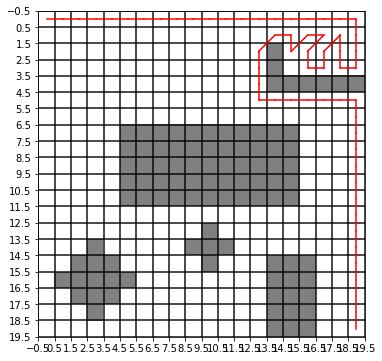

In [7]:
path, discovered_nodes, cost = dfs(game_map, Node(0, 0), Node(19, 19))
print('Number of nodes explored', len(list(discovered_nodes)))
print(cost)
game_map.plot_path(path)

Number of nodes explored 304
38.0


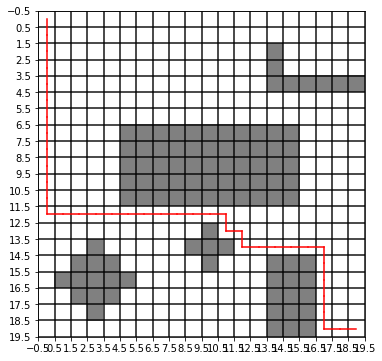

In [8]:
path, discovered_nodes, cost = bfs(game_map, Node(0, 0), Node(19, 19))
print('Number of nodes explored', len(list(discovered_nodes)))
print(cost)
game_map.plot_path(path)

Number of nodes explored 302
38.0


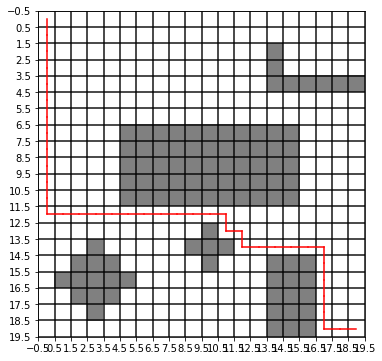

In [9]:
path, discovered_nodes, cost = A_star(game_map, Node(0, 0), Node(19, 19))
print('Number of nodes explored', len(list(discovered_nodes)))
print(cost)
game_map.plot_path(path)

# Continuous case

In [10]:
game_map = ContinuousMap(20, 20, ContinuousMap1.get_nodes(),
                         ContinuousMap1.get_adjacency_matrix())

Number of nodes explored 14
33.78347040186393


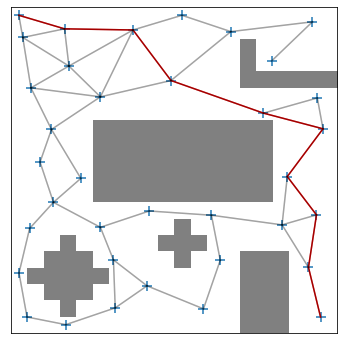

In [11]:
path, discovered_nodes, cost = dfs(game_map, Node(0, 0), Node(18.5, 18.5))
print('Number of nodes explored', len(list(discovered_nodes)))
print(cost)
game_map.plot_path(path)

Number of nodes explored 36
33.62145496583267


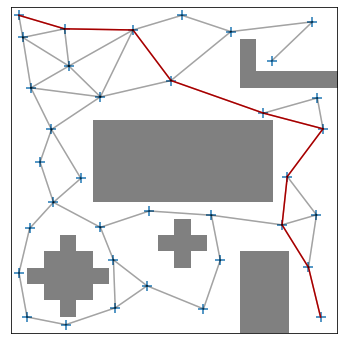

In [12]:
path, discovered_nodes, cost = bfs(game_map, Node(0, 0), Node(18.5, 18.5))
print('Number of nodes explored', len(list(discovered_nodes)))
print(cost)
game_map.plot_path(path)

Number of nodes explored 27
32.89002371522335


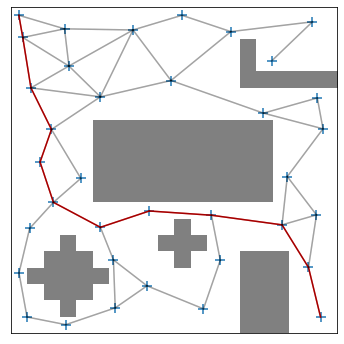

In [13]:
path, discovered_nodes, cost = A_star(game_map, Node(0, 0), Node(18.5, 18.5))
print('Number of nodes explored', len(list(discovered_nodes)))
print(cost)
game_map.plot_path(path)